<a href="https://colab.research.google.com/github/Nandana-Sunil/AI_assignment/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  # Import the necessary library
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
print(df.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

In [6]:
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [7]:
df_cleaned = df.dropna()

In [8]:
print(df.duplicated().sum())

0


In [9]:
df_no_duplicates = df.drop_duplicates()

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Handle missing values
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
#StandardScaler
standard_scaler = StandardScaler()
standard_scaled = pd.DataFrame( standard_scaler.fit_transform(df[numerical_columns]),columns=numerical_columns)
print("\nStandard Scaled Data:")
print(standard_scaled.head())




Standard Scaled Data:
        Age       Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.712094  0.689500         0.870928 -0.075410     1.402212     -0.417029   
1  1.382140 -1.450327        -0.183559 -0.916759     6.093004     -0.417029   
2  0.282294  0.689500        -1.238045 -0.411950     0.219823     -0.417029   
3  1.052186  0.689500         0.870928 -0.187590     0.258589     -0.417029   
4  2.152032 -1.450327        -1.238045 -0.636310     0.374890     -0.417029   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0     0.981664 -1.759208        -0.701222       1.181012     0.676419   
1     0.981664  0.446409        -0.701222       0.481153     0.676419   
2    -1.026285 -0.375291        -0.701222      -0.656118    -0.954234   
3    -1.026285 -1.932198         1.426081      -0.743600     0.676419   
4     0.981664 -1.240239         1.426081      -0.743600    -0.954234   

   Number of vessels fluro  Thallium  
0                 2.4726

In [12]:
#splitting for testing
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
115   49    0                2  134          271             0            0   
33    59    1                4  170          326             0            2   
184   53    1                3  130          246             1            2   
142   50    1                3  140          233             0            0   
197   54    0                3  110          214             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
20    67    1                4  120          229             0            2   
188   62    0                4  140          394             0            2   
71    57    0                4  120          354             0            0   
106   51    1                3  100          222             0            0   
102   49    0                4  130          269             0            0   

     Max HR  Exercise angina  ST depression  Slope 

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[29  4]
 [ 7 14]]


In [16]:
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

     Absence       0.81      0.88      0.84        33
    Presence       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.63%


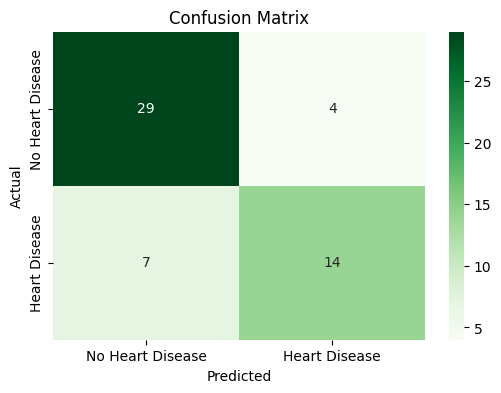

In [18]:
plt.figure(figsize=(6,4))
class_labels = ['No Heart Disease', 'Heart Disease']
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

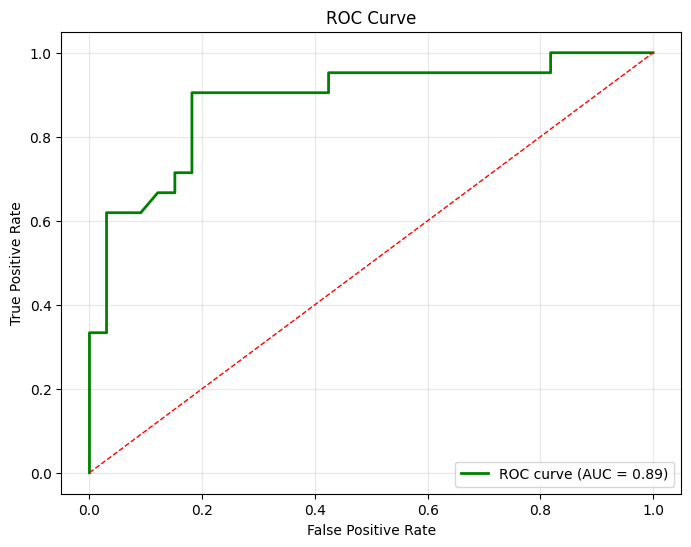

AUC Score: 0.89


In [19]:
#encoding
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y_test)

# Transform y_test to encoded values (0 and 1)
y_test_encoded = label_encoder.transform(y_test)

# Now, use the encoded y_test for roc_curve
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Presence')
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

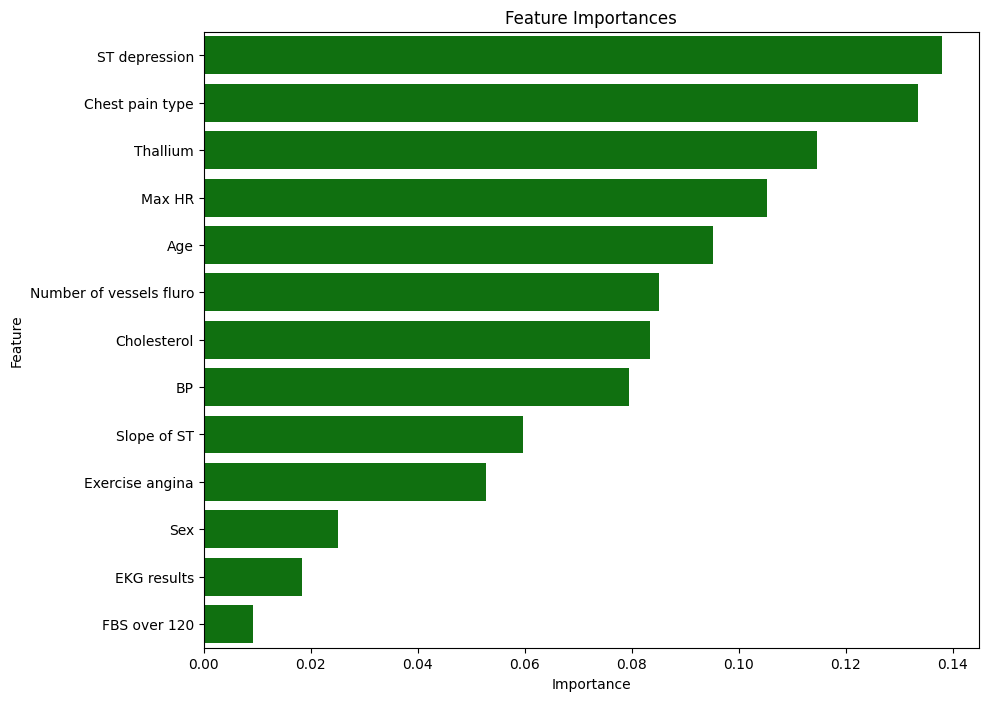

In [20]:
feature_importances = rf_model.feature_importances_
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
fi_df = fi_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=fi_df,color='green')
plt.title('Feature Importances')
plt.show()